In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from datetime import datetime
from pandas import Series
%matplotlib inline
import warnings

In [2]:
train=pd.read_csv("ts_train.csv")
test=pd.read_csv("ts_test.csv")

In [3]:
train_og=train.copy()
test_og=test.copy()

In [4]:
train.columns, test.columns

(Index(['ID', 'Datetime', 'Count'], dtype='object'),
 Index(['ID', 'Datetime'], dtype='object'))

In [5]:
train.dtypes, test.dtypes

(ID           int64
 Datetime    object
 Count        int64
 dtype: object,
 ID           int64
 Datetime    object
 dtype: object)

In [6]:
train.shape, test.shape

((18288, 3), (5112, 2))

In [7]:
train["Datetime"]=pd.to_datetime(train.Datetime, format="%d-%m-%Y %H:%M")
test["Datetime"]=pd.to_datetime(test.Datetime, format="%d-%m-%Y %H:%M")
train_og["Datetime"]=pd.to_datetime(train_og.Datetime, format="%d-%m-%Y %H:%M")
test_og["Datetime"]=pd.to_datetime(test_og.Datetime, format="%d-%m-%Y %H:%M")

In [8]:
#creating new columns

for i in (train, test, test_og, train_og):
    i["year"]=i.Datetime.dt.year
    i["month"]=i.Datetime.dt.month
    i["day"]=i.Datetime.dt.day
    i["hour"]=i.Datetime.dt.hour

In [9]:
train.head()

,ID,Datetime,Count,year,month,day,hour
0,0,2012-08-25 00:00:00,8,2012,8,25,0
1,1,2012-08-25 01:00:00,2,2012,8,25,1
2,2,2012-08-25 02:00:00,6,2012,8,25,2
3,3,2012-08-25 03:00:00,2,2012,8,25,3
4,4,2012-08-25 04:00:00,2,2012,8,25,4


In [10]:
train["day of week"]=train["Datetime"].dt.dayofweek
temp=train["Datetime"]

In [11]:
#1 if weekend, 0 if workweek
def applyer(row):
    if row.dayofweek == 5 or row.dayofweek == 6:
        return 1
    else:
        return 0 
temp2 = train['Datetime'].apply(applyer) 
train['weekend']=temp2

In [12]:
train.head()

,ID,Datetime,Count,year,month,day,hour,day of week,weekend
0,0,2012-08-25 00:00:00,8,2012,8,25,0,5,1
1,1,2012-08-25 01:00:00,2,2012,8,25,1,5,1
2,2,2012-08-25 02:00:00,6,2012,8,25,2,5,1
3,3,2012-08-25 03:00:00,2,2012,8,25,3,5,1
4,4,2012-08-25 04:00:00,2,2012,8,25,4,5,1


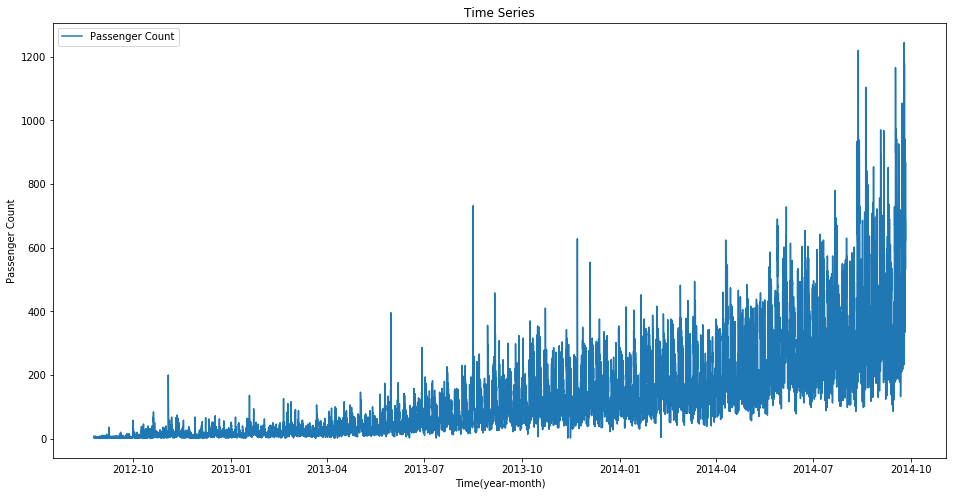

In [13]:
train.index=train["Datetime"]
df=train.drop("ID",1)
ts=df["Count"]
plt.figure(figsize=(16,8))
plt.plot(ts,label="Passenger Count")
plt.title("Time Series")
plt.xlabel("Time(year-month)")
plt.ylabel("Passenger Count")
plt.legend(loc="best")


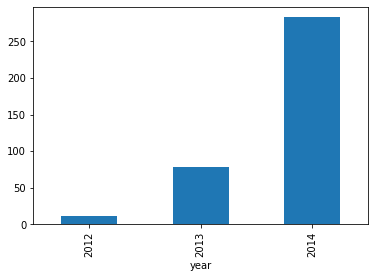

In [14]:
train.groupby('year')['Count'].mean().plot.bar()

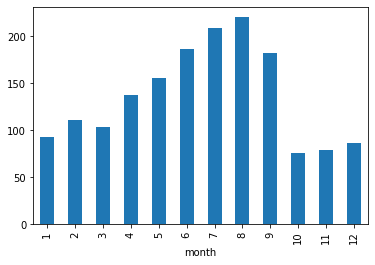

In [15]:
train.groupby("month")["Count"].mean().plot.bar()

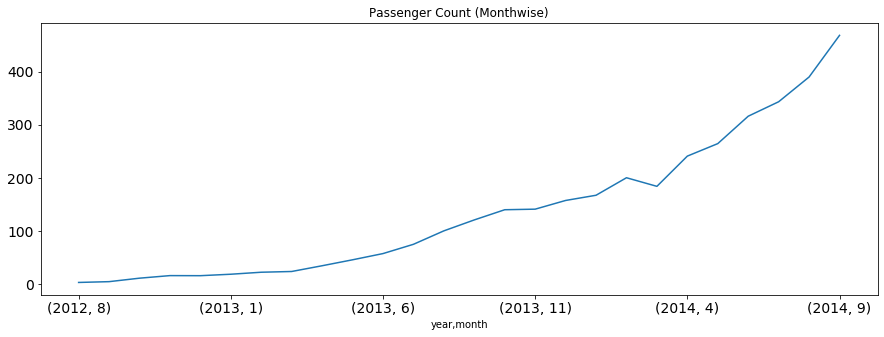

In [16]:
temp=train.groupby(["year", "month"])["Count"].mean()
temp.plot(figsize=(15,5), title="Passenger Count (Monthwise)", fontsize=14)

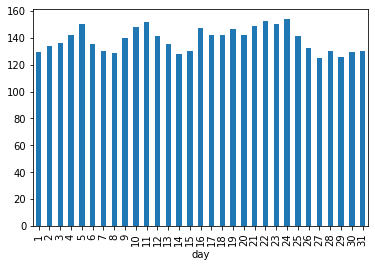

In [17]:
train.groupby("day")["Count"].mean().plot.bar()

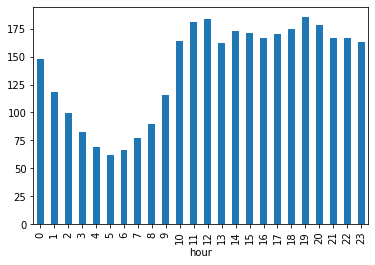

In [18]:
train.groupby("hour")["Count"].mean().plot.bar()

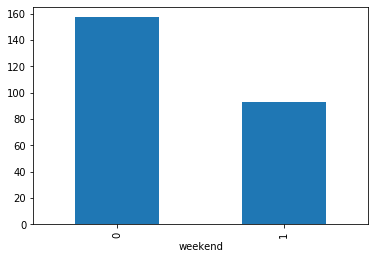

In [19]:
train.groupby("weekend")["Count"].mean().plot.bar()

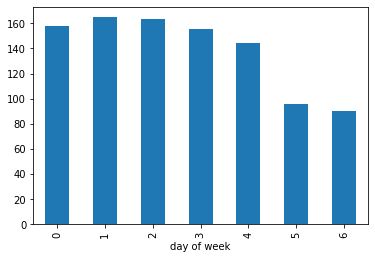

In [20]:
train.groupby("day of week")["Count"].mean().plot.bar()

In [21]:
#train.groupby('year')['Count'].mean().plot.bar()

In [22]:
train.Timestamp=pd.to_datetime(train.Datetime, format="%d-%m-%Y,%H-%M")
train.index=train.Timestamp
hourly=train.resample("H").mean()
daily=train.resample("D").mean()
weekly=train.resample("W").mean()
monthly=train.resample("M").mean()

C:\Users\Marlon\anaconda3\lib\site-packages\ipykernel_launcher.py:1: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
  """Entry point for launching an IPython kernel.


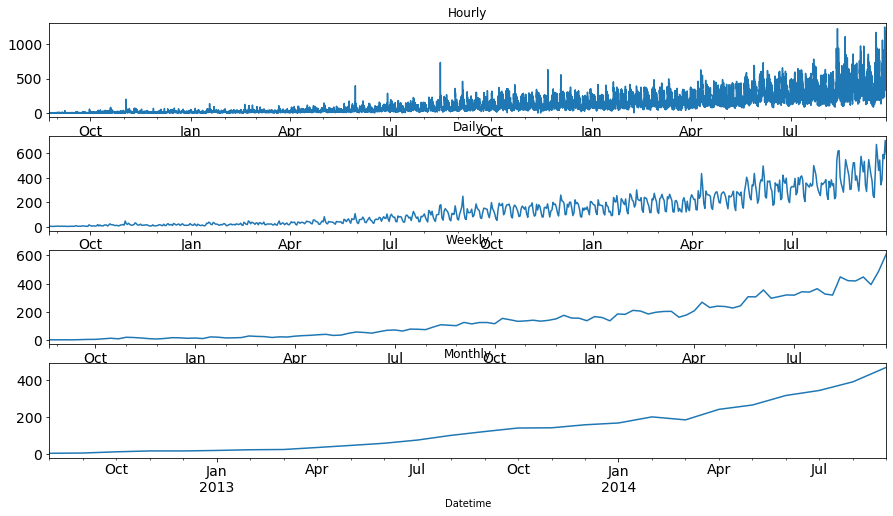

In [23]:
fig, axs=plt.subplots(4,1)
hourly.Count.plot(figsize=(15,8),title='Hourly', fontsize=14,ax=axs[0])
daily.Count.plot(figsize=(15,8),title='Daily', fontsize=14,ax=axs[1])
weekly.Count.plot(figsize=(15,8),title='Weekly', fontsize=14,ax=axs[2])
monthly.Count.plot(figsize=(15,8),title='Monthly', fontsize=14,ax=axs[3])

In [24]:
test.Timestamp=pd.to_datetime(test.Datetime, format="%d-%m-%Y %H:%M")
test.index=test.Timestamp

test=test.resample("D").mean()
train.Timestamp = pd.to_datetime(train.Datetime,format='%d-%m-%Y %H:%M') 
train.index = train.Timestamp 
# Converting to daily mean 
train = train.resample('D').mean()

C:\Users\Marlon\anaconda3\lib\site-packages\ipykernel_launcher.py:1: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
  """Entry point for launching an IPython kernel.


In [25]:
train2=train.copy()
train=train['2012-08-25':'2014-06-24']
valid=train2['2014-06-25':'2014-09-25']

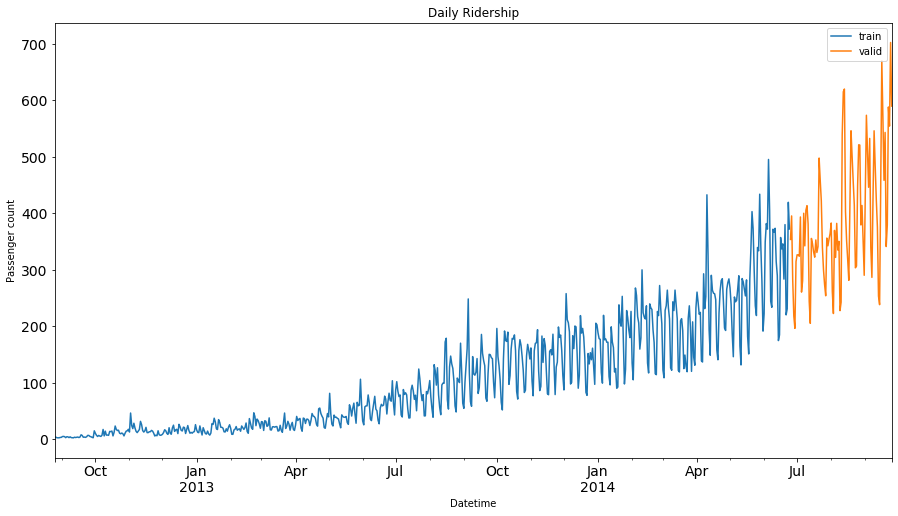

In [26]:
train.Count.plot(figsize=(15,8), title= 'Daily Ridership', fontsize=14, label='train') 
valid.Count.plot(figsize=(15,8), title= 'Daily Ridership', fontsize=14, label='valid') 
plt.xlabel("Datetime") 
plt.ylabel("Passenger count") 
plt.legend(loc='best') 
plt.show()

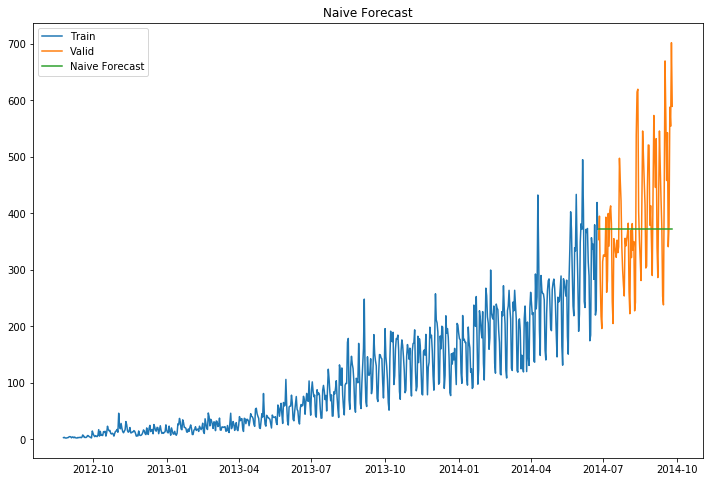

In [27]:
#naive approach

dd= np.asarray(train.Count) 
y_hat = valid.copy() 
y_hat['naive'] = dd[len(dd)-1] 
plt.figure(figsize=(12,8)) 
plt.plot(train.index, train['Count'], label='Train') 
plt.plot(valid.index,valid['Count'], label='Valid') 
plt.plot(y_hat.index,y_hat['naive'], label='Naive Forecast') 
plt.legend(loc='best') 
plt.title("Naive Forecast") 
plt.show()
 

In [28]:
#accuracy of prediction using root mean square error/standard dev of the residuals. residuals=how far from the regression line
#data points are

from sklearn.metrics import mean_squared_error
from math import sqrt
rms=sqrt(mean_squared_error(valid.Count, y_hat.naive))
print(rms)


111.79050467496724


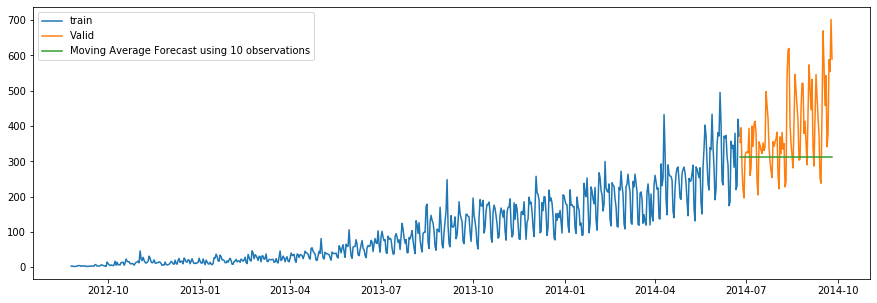

In [29]:
#moving average which considers last 10,20,50 days


y_hat_avg = valid.copy() 
y_hat_avg['moving_avg_forecast'] = train['Count'].rolling(10).mean().iloc[-1] # average of last 10 observations. 
plt.figure(figsize=(15,5)) 
plt.plot(train['Count'], label='train') 
plt.plot(valid['Count'], label='Valid') 
plt.plot(y_hat_avg['moving_avg_forecast'], label='Moving Average Forecast using 10 observations') 
plt.legend(loc='best') 
plt.show() 


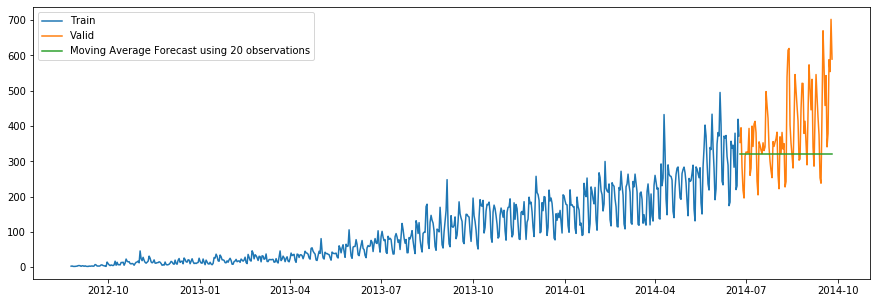

In [30]:
y_hat_avg = valid.copy() 
y_hat_avg['moving_avg_forecast'] = train['Count'].rolling(20).mean().iloc[-1] # average of last 20 observations. 
plt.figure(figsize=(15,5)) 
plt.plot(train['Count'], label='Train') 
plt.plot(valid['Count'], label='Valid') 
plt.plot(y_hat_avg['moving_avg_forecast'], label='Moving Average Forecast using 20 observations') 
plt.legend(loc='best') 
plt.show() 



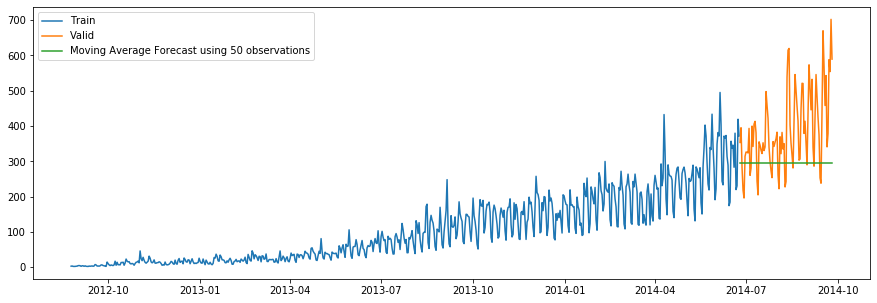

In [31]:
y_hat_avg = valid.copy() 
y_hat_avg['moving_avg_forecast'] = train['Count'].rolling(50).mean().iloc[-1] # average of last 50 observations. 
plt.figure(figsize=(15,5)) 
plt.plot(train['Count'], label='Train') 
plt.plot(valid['Count'], label='Valid') 
plt.plot(y_hat_avg['moving_avg_forecast'], label='Moving Average Forecast using 50 observations') 
plt.legend(loc='best') 
plt.show()

In [32]:
rms = sqrt(mean_squared_error(valid.Count, y_hat_avg.moving_avg_forecast)) 
print(rms)

144.19175679986802


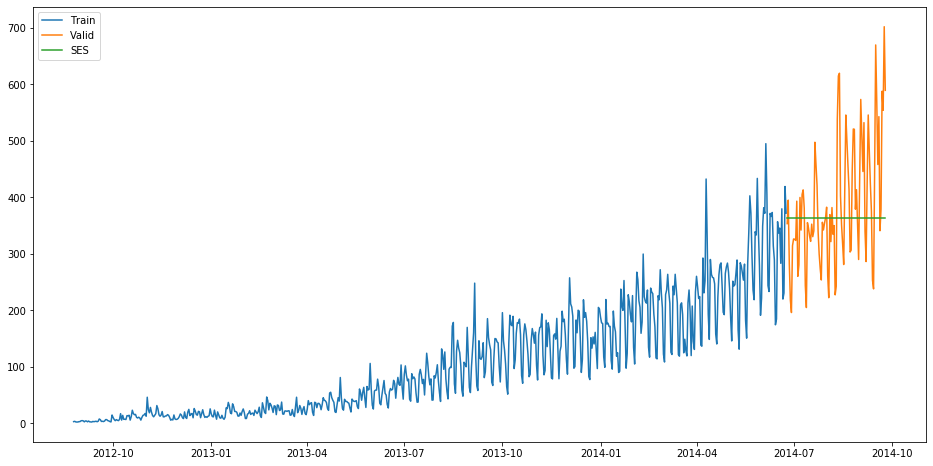

In [33]:
#simple exponential smoothing

from statsmodels.tsa.api import ExponentialSmoothing, SimpleExpSmoothing, Holt 
y_hat_avg = valid.copy() 
fit2 = SimpleExpSmoothing(np.asarray(train['Count'])).fit(smoothing_level=0.6,optimized=False)
y_hat_avg['SES'] = fit2.forecast(len(valid)) 
plt.figure(figsize=(16,8)) 
plt.plot(train['Count'], label='Train') 
plt.plot(valid['Count'], label='Valid') 
plt.plot(y_hat_avg['SES'], label='SES') 
plt.legend(loc='best') 
plt.show()

In [34]:
rms = sqrt(mean_squared_error(valid.Count, y_hat_avg.SES)) 
print(rms)

113.43708111884514


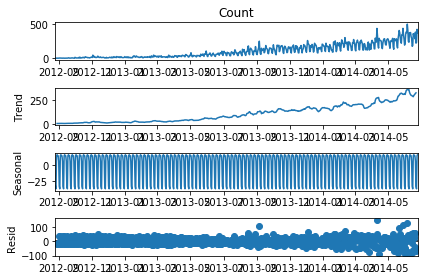

In [35]:
#holt's linear trend model

import statsmodels.api as sm 
sm.tsa.seasonal_decompose(train.Count).plot() 
result = sm.tsa.stattools.adfuller(train.Count) 
plt.show()

C:\Users\Marlon\anaconda3\lib\site-packages\statsmodels\tsa\holtwinters.py:731: RuntimeWarning: invalid value encountered in greater_equal
  loc = initial_p >= ub


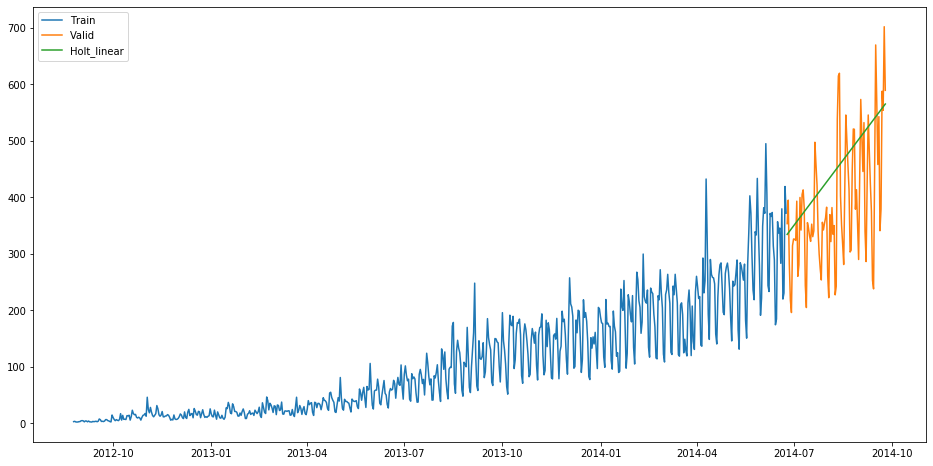

In [36]:
#increasing trend can be seen, so make a model based on the trend

y_hat_avg = valid.copy() 
fit1 = Holt(np.asarray(train['Count'])).fit(smoothing_level = 0.3,smoothing_slope = 0.1) 
y_hat_avg['Holt_linear'] = fit1.forecast(len(valid)) 
plt.figure(figsize=(16,8)) 
plt.plot(train['Count'], label='Train') 
plt.plot(valid['Count'], label='Valid') 
plt.plot(y_hat_avg['Holt_linear'], label='Holt_linear') 
plt.legend(loc='best') 
plt.show()

In [37]:
rms = sqrt(mean_squared_error(valid.Count, y_hat_avg.Holt_linear)) 
print(rms)

112.94278345314041


In [38]:
submission=pd.read_csv("ts_submission.csv")
predict=fit1.forecast(len(test))
test['prediction']=predict


In [39]:
# Calculating the hourly ratio of count 
train_og['ratio']=train_og['Count']/train_og['Count'].sum() 

In [40]:
# Grouping the hourly ratio 
temp=train_og.groupby(['hour'])['ratio'].sum() 

In [41]:
# Groupby to csv format 
pd.DataFrame(temp, columns=['hour','ratio']).to_csv('GROUPby.csv') 

In [42]:
temp2=pd.read_csv("GROUPby.csv") 
temp2=temp2.drop('hour.1',1)
print(temp2.head())

   hour     ratio
0     0  0.044287
1     1  0.035343
2     2  0.029911
3     3  0.024714
4     4  0.020802


In [43]:
merge=pd.merge(test, test_og, on=('day','month', 'year'), how='left')
merge['hour']=merge['hour_y'] 


In [44]:
merge=merge.drop(['year', 'month', 'Datetime','hour_x','hour_y'], axis=1) 

In [45]:
# Predicting by merging merge and temp2 
prediction=pd.merge(merge, temp2, on='hour', how='left') 

In [46]:
# Converting the ratio to the original scale 
prediction['Count']=prediction['prediction']*prediction['ratio']*24 
prediction['ID']=prediction['ID_y']

In [47]:
submission=prediction.drop(['ID_x', 'day', 'ID_y','prediction','hour', 'ratio'],axis=1) 
# Converting the final submission to csv format 
pd.DataFrame(submission, columns=['ID','Count']).to_csv('Holt linear.csv')

C:\Users\Marlon\anaconda3\lib\site-packages\statsmodels\tsa\holtwinters.py:725: RuntimeWarning: invalid value encountered in less_equal
  loc = initial_p <= lb
C:\Users\Marlon\anaconda3\lib\site-packages\statsmodels\tsa\holtwinters.py:731: RuntimeWarning: invalid value encountered in greater_equal
  loc = initial_p >= ub


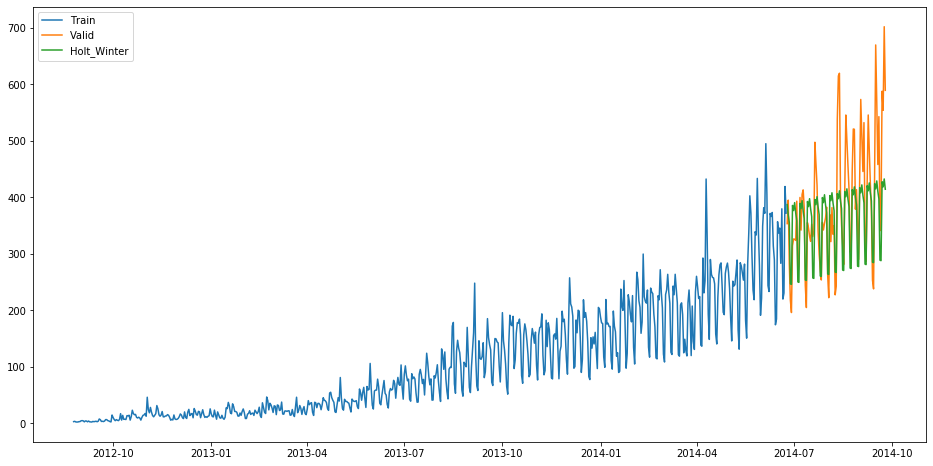

In [48]:
#holt's winter model=also exponential smooth seasonality on  top of trends and levels

y_hat_avg = valid.copy() 
fit1 = ExponentialSmoothing(np.asarray(train['Count']) ,seasonal_periods=7 ,trend='add', seasonal='add',).fit() 
y_hat_avg['Holt_Winter'] = fit1.forecast(len(valid)) 
plt.figure(figsize=(16,8)) 
plt.plot( train['Count'], label='Train') 
plt.plot(valid['Count'], label='Valid') 
plt.plot(y_hat_avg['Holt_Winter'], label='Holt_Winter') 
plt.legend(loc='best') 
plt.show()

In [49]:
rms = sqrt(mean_squared_error(valid.Count, y_hat_avg.Holt_Winter)) 
print(rms)

82.38104907695254


In [50]:
predict=fit1.forecast(len(test))

In [51]:
test['prediction']=predict

In [52]:
# Merge Test and test_original on day, month and year 
merge=pd.merge(test, test_og, on=('day','month', 'year'), how='left') 
merge['hour']=merge['hour_y'] 
merge=merge.drop(['year', 'month', 'Datetime','hour_x','hour_y'], axis=1) 


In [53]:
# Predicting by merging merge and temp2 
prediction=pd.merge(merge, temp2, on='hour', how='left') 

In [54]:
# Converting the ratio to the original scale 
prediction['Count']=prediction['prediction']*prediction['ratio']*24

In [55]:
prediction['ID']=prediction['ID_y'] 
submission=prediction.drop(['day','hour','ratio','prediction', 'ID_x', 'ID_y'],axis=1) 

In [56]:
# Converting the final submission to csv format
pd.DataFrame(submission, columns=['ID','Count']).to_csv('Holt winters.csv')

In [57]:
#from statsmodels.tsa.stattools import adfuller 
#def test_stationarity(timeseries):
        #Determing rolling statistics
 #   rolmean = train_og.rolling.mean(timeseries, window=24) # 24 hours on each day
  #  rolstd = train

C:\Users\Marlon\anaconda3\lib\site-packages\statsmodels\base\model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


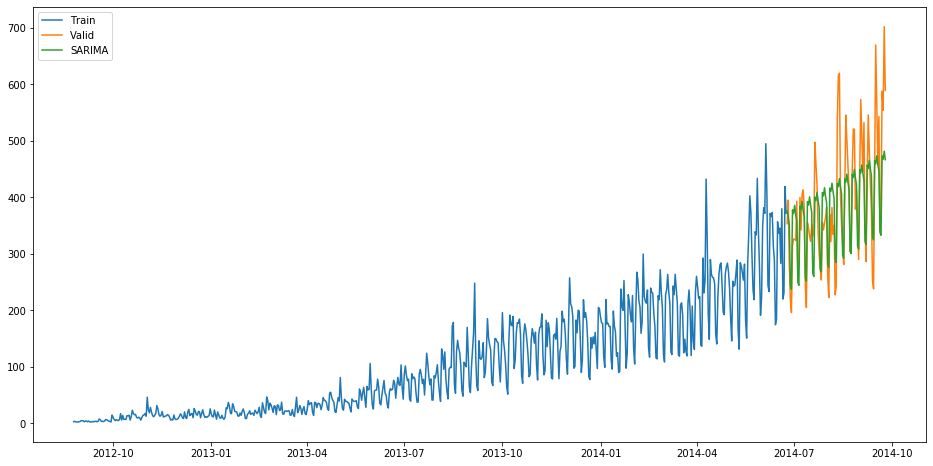

In [58]:
#SARIMAX

import statsmodels.api as sm
y_hat_avg = valid.copy() 
fit1 = sm.tsa.statespace.SARIMAX(train.Count, order=(2, 1, 4),seasonal_order=(0,1,1,7)).fit() 
y_hat_avg['SARIMA'] = fit1.predict(start="2014-6-25", end="2014-9-25", dynamic=True) 
plt.figure(figsize=(16,8)) 
plt.plot(train['Count'], label='Train') 
plt.plot(valid['Count'], label='Valid') 
plt.plot(y_hat_avg['SARIMA'], label='SARIMA') 
plt.legend(loc='best') 
plt.show()





In [59]:
rms = sqrt(mean_squared_error(valid.Count, y_hat_avg.SARIMA)) 
print(rms)

69.72044471605734


In [60]:
predict=fit1.predict(start="2014-9-26", end="2015-4-26", dynamic=True)

C:\Users\Marlon\anaconda3\lib\site-packages\statsmodels\tsa\statespace\kalman_filter.py:2014: ValueWarning: Dynamic prediction specified to begin during out-of-sample forecasting period, and so has no effect.
  ' effect.', ValueWarning)


In [63]:
test['prediction']=predict
# Merge Test and test_original on day, month and year 
merge=pd.merge(test, test_og, on=('day','month', 'year'), how='left') 
merge['hour']=merge['hour_y'] 
merge=merge.drop(['year', 'month', 'Datetime','hour_x','hour_y'], axis=1) 

# Predicting by merging merge and temp2 
prediction=pd.merge(merge, temp2, on='hour', how='left') 

# Converting the ratio to the original scale 
prediction['Count']=prediction['prediction']*prediction['ratio']*24
#Let’s drop all variables other than ID and Count

prediction['ID']=prediction['ID_y'] 
submission=prediction.drop(['day','hour','ratio','prediction', 'ID_x', 'ID_y'],axis=1) 

# Converting the final submission to csv format 
pd.DataFrame(submission, columns=['ID','Count']).to_csv('SARIMAX.csv')

In [62]:
print(submission.head(5))

      ID
0  18288
1  18289
2  18290
3  18291
4  18292
